# Analiza rezultata treniranja

In [22]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

In [2]:
colors = ['#465BBB', '#3F8FCE', '#7ABBCE', '#3A3865', '#A82F43', '#612A37', '#DC5433', '#F29457']
b1 = '#465BBB'
b2 = '#3F8FCE'
b3 = '#7ABBCE'
b4 = '#3A3865'
black1 = '#22212A'
black2 = '#2D1E21'
or1 = '#A82F43'
or2 = '#612A37'
or3 = '#DC5433'
or4 = '#F29457'
muted_colors = sns.set_palette(sns.color_palette(colors))


In [23]:
fm.get_font_names()

['cmss10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'cmb10',
 'STIXSizeOneSym',
 'cmmi10',
 'cmtt10',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'cmr10',
 'cmex10',
 'DejaVu Sans',
 'cmsy10']

In [62]:
# Set up your font properties (optional)
font = fm.FontProperties()
font.set_family('serif')
font.set_name('DejaVu Sans Mono')  # Times font
sns.set(font="DejaVu Sans Mono")

%matplotlib inline 

# 32 EPOHA je izabrana zato sto nakon nje model pocinje blago pretrenirati

## 1. Ciklus

In [5]:
results_run1 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run1_02/results_runs_bench_final_true.pkl", "rb"))
results_class_run1 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run1_02/results_runs_class_bench_final_true.pkl", "rb"))

In [69]:
train_loss_run1 = [results_run1[i][0] for i in results_run1]
train_acc_run1 = [results_run1[i][1] for i in results_run1]
train_prec_run1 = [results_run1[i][2] for i in results_run1]
train_recall_run1 = [results_run1[i][3] for i in results_run1]
train_F1_run1 = [results_run1[i][4] for i in results_run1]

valid_loss_run1 = [results_run1[i][5] for i in results_run1]
valid_acc_run1 = [results_run1[i][6] for i in results_run1]
valid_prec_run1 = [results_run1[i][7] for i in results_run1]
valid_recall_run1 = [results_run1[i][8] for i in results_run1]
valid_F1_run1 = [results_run1[i][9] for i in results_run1]

train_prec_class_run1 = [results_class_run1[i][3] for i in results_class_run1]
train_recall_class_run1 = [results_class_run1[i][4] for i in results_class_run1]
train_F1_class_run1 = [results_class_run1[i][5] for i in results_class_run1]

valid_prec_class_run1 = [results_class_run1[i][9] for i in results_class_run1]
valid_recall_class_run1 = [results_class_run1[i][10] for i in results_class_run1]
valid_F1_class_run1 = [results_class_run1[i][11] for i in results_class_run1]

valid_probs_run1 = [results_class_run1[i][6] for i in results_class_run1]
valid_true_run1 = [results_class_run1[i][7] for i in results_class_run1]
valid_ids_run1 = [results_class_run1[i][8] for i in results_class_run1]

---

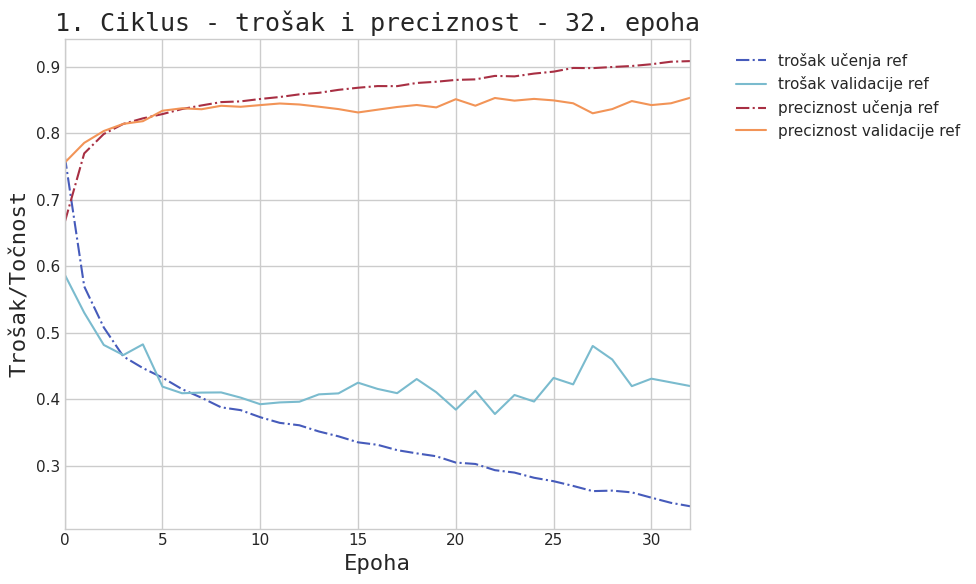

In [70]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,6))

plt.plot(train_loss_run1[:33], color=b1, linestyle="dashdot", label="trošak učenja ref")
plt.plot(valid_loss_run1[:33], color=b3, label="trošak validacije ref")
plt.plot(train_acc_run1[:33], color=or1, linestyle="dashdot", label="točnost učenja ref")
plt.plot(valid_acc_run1[:33], color=or4, label="točnost validacije ref")
# oznaka x-osi
plt.xlim([0,32])
plt.xlabel("Epoha",fontproperties=font, fontsize=16)
# oznaka y-osi
plt.ylabel("Trošak/Točnost",fontproperties=font, fontsize=16)
# naslov grafa
plt.title("1. Ciklus - trošak i točnost - 32. epoha",fontproperties=font, fontsize=18)
# legenda
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [71]:
per_class = pd.DataFrame()

vprec_class = valid_prec_class_run1[32]
vrecall_class = valid_recall_class_run1[32]
vf1_class = valid_F1_class_run1[32]
tprec_class = train_prec_class_run1[32]
trecall_class = train_recall_class_run1[32]
tf1_class = train_F1_class_run1[32]

per_class['Preciznost (U)'] = vprec_class
per_class['Osjetljivost (U)'] = vrecall_class
per_class['F1 mjera (U)'] = vf1_class

per_class['Preciznost (V)'] = tprec_class
per_class['Osjetjlivost (V)'] = trecall_class
per_class['F1 mjera (V)'] = tf1_class

per_class

,Preciznost (U),Osjetljivost (U),F1 mjera (U),Preciznost (V),Osjetjlivost (V),F1 mjera (V)
0,0.835098,0.825112,0.830075,0.897582,0.882875,0.890168
1,0.863460,0.908951,0.885622,0.916714,0.941475,0.928930
2,0.868475,0.838025,0.852978,0.915342,0.911369,0.913352


In [72]:
predicted = np.argmax(valid_probs_run1[32], axis=1)
predicted[:4]

array([0, 1, 1, 0])

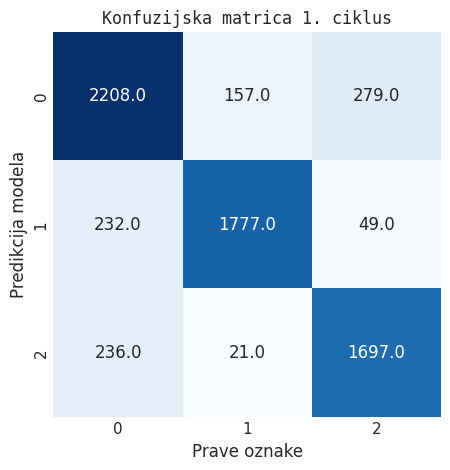

In [73]:
ct = pd.crosstab(predicted,  valid_true_run1[32], rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(5,5))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="012", yticklabels="012", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica 1. ciklus",fontproperties=font, fontsize=12)
plt.show()

---

# 2. Ciklus

In [75]:
results_run2 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run2_02/results_runs_bench_final_true.pkl", "rb"))
results_class_run2 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run2_02/results_runs_class_bench_final_true.pkl", "rb"))

In [76]:
train_loss_run2 = [results_run2[i][0] for i in results_run2]
train_acc_run2 = [results_run2[i][1] for i in results_run2]
train_prec_run2 = [results_run2[i][2] for i in results_run2]
train_recall_run2 = [results_run2[i][3] for i in results_run2]
train_F1_run2 = [results_run2[i][4] for i in results_run2]
valid_loss_run2 = [results_run2[i][5] for i in results_run2]
valid_acc_run2 = [results_run2[i][6] for i in results_run2]
valid_prec_run2 = [results_run2[i][7] for i in results_run2]
valid_recall_run2 = [results_run2[i][8] for i in results_run2]
valid_F1_run2 = [results_run2[i][9] for i in results_run2]

train_prec_class_run2 = [results_class_run2[i][3] for i in results_class_run2]
train_recall_class_run2 = [results_class_run2[i][4] for i in results_class_run2]
train_F1_class_run2 = [results_class_run2[i][5] for i in results_class_run2]

valid_prec_class_run2 = [results_class_run2[i][9] for i in results_class_run2]
valid_recall_class_run2 = [results_class_run2[i][10] for i in results_class_run2]
valid_F1_class_run2 = [results_class_run2[i][11] for i in results_class_run2]

valid_probs_run2 = [results_class_run2[i][6] for i in results_class_run2]
valid_true_run2 = [results_class_run2[i][7] for i in results_class_run2]
valid_ids_run2 = [results_class_run2[i][8] for i in results_class_run2]22

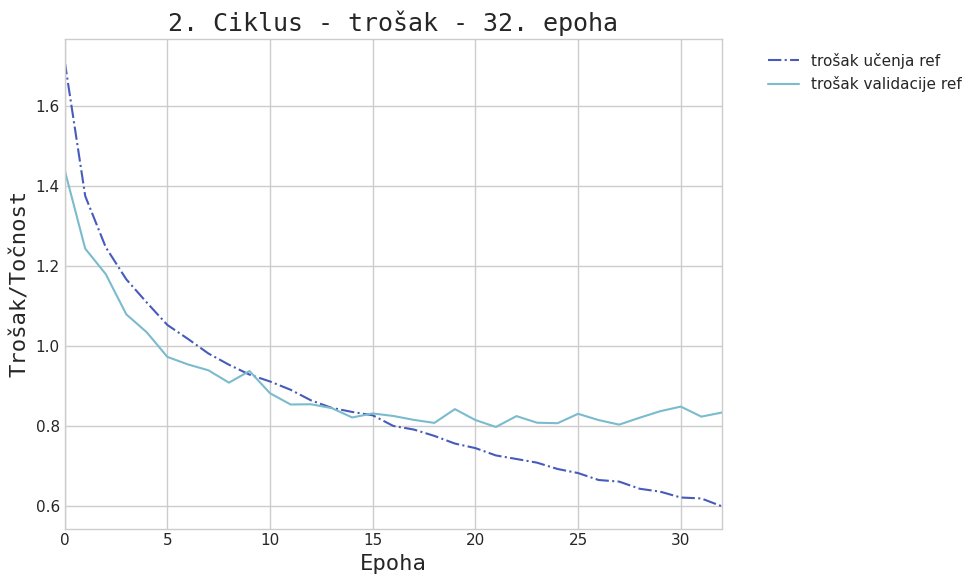

In [78]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,6))

plt.plot(train_loss_run2[:33], color=b1, linestyle="dashdot", label="trošak učenja ref")
plt.plot(valid_loss_run2[:33], color=b3, label="trošak validacije ref")
#plt.plot(train_acc_run2[:33], color=or1, linestyle="dashdot", label="preciznost učenja ref")
#plt.plot(valid_acc_run2[:33], color=or4, label="preciznost validacije ref")
# oznaka x-osi
plt.xlim([0,32])
plt.xlabel("Epoha",fontproperties=font, fontsize=16)
# oznaka y-osi
plt.ylabel("Trošak/Točnost",fontproperties=font, fontsize=16)
# naslov grafa
plt.title("2. Ciklus - trošak - 32. epoha",fontproperties=font, fontsize=18)
# legenda
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

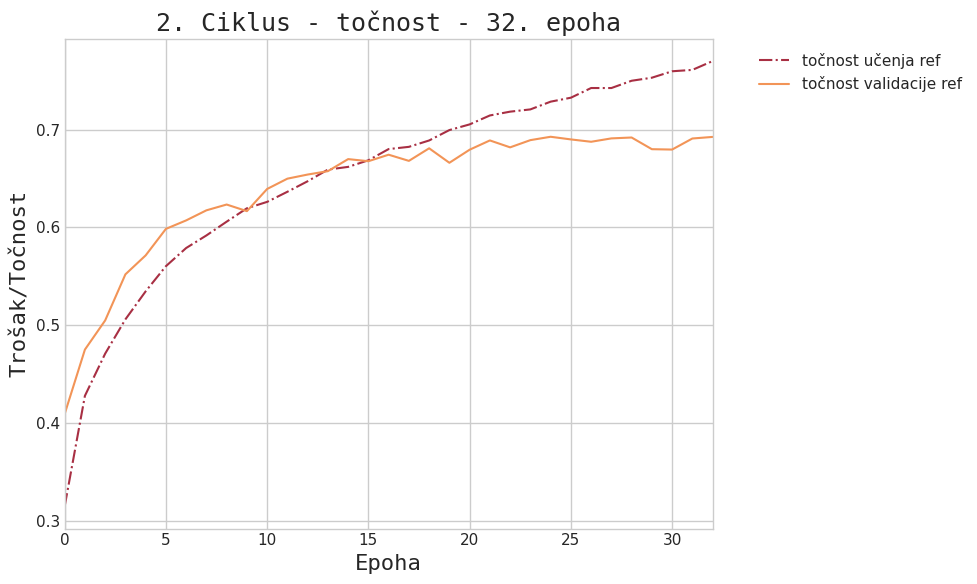

In [79]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,6))

#plt.plot(train_loss_run2[:33], color=b1, linestyle="dashdot", label="trošak učenja ref")
#plt.plot(valid_loss_run2[:33], color=b3, label="trošak validacije ref")
plt.plot(train_acc_run2[:33], color=or1, linestyle="dashdot", label="točnost učenja ref")
plt.plot(valid_acc_run2[:33], color=or4, label="točnost validacije ref")
# oznaka x-osi
plt.xlim([0,32])
plt.xlabel("Epoha",fontproperties=font, fontsize=16)
# oznaka y-osi
plt.ylabel("Trošak/Točnost",fontproperties=font, fontsize=16)
# naslov grafa
plt.title("2. Ciklus - točnost - 32. epoha",fontproperties=font, fontsize=18)
# legenda
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
per_class = pd.DataFrame()

vprec_class = valid_prec_class_run1[32]
vrecall_class = valid_recall_class_run1[32]
vf1_class = valid_F1_class_run1[32]
tprec_class = train_prec_class_run1[32]
trecall_class = train_recall_class_run1[32]
tf1_class = train_F1_class_run1[32]

per_class['Preciznost (U)'] = vprec_class
per_class['Osjetljivost (U)'] = vrecall_class
per_class['F1 mjera (U)'] = vf1_class

per_class['Preciznost (V)'] = tprec_class
per_class['Osjetjlivost (V)'] = trecall_class
per_class['F1 mjera (V)'] = tf1_class

per_class